In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
import seaborn as sns
sns.set()
%matplotlib inline 

In [30]:
np.random.seed(1)

num_samples = 100

# The mean values of x and y .
mu_1 = np.array([0, 0, 0])
mu_2 = np.array([1.,1.,1.])

# The desired covariance matrix.
cov_1 = np.array([
        [  1., 0., 0.],
        [ 0., 1., 0.],
        [0., 0., 1.]
    ])

cov_2 = np.array([
        [  1., 0., 0.],
        [ 0., 1., 0.],
        [0., 0., 1.]
    ])
# Generate the random samples.
class_1 = np.random.multivariate_normal(mu_1, cov_1, size=50).T
class_2 = np.random.multivariate_normal(mu_2, cov_2, size=50).T

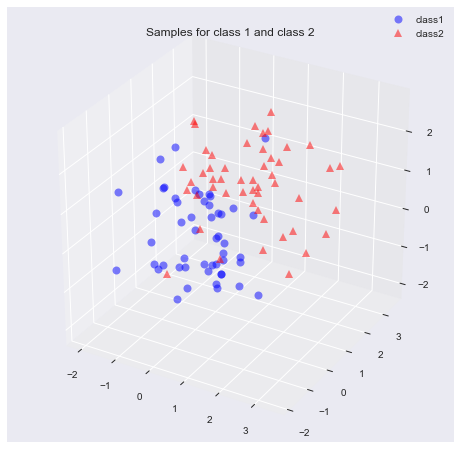

In [31]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class_1[0,:], class_1[1,:], class_1[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class_2[0,:], class_2[1,:], class_2[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [32]:
all_samples = np.concatenate((class_1, class_2), axis=1)

In [33]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.5179277 ]
 [0.58671813]
 [0.61855369]]


In [34]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Scatter Matrix:
 [[124.3281553   11.20008165  27.66628275]
 [ 11.20008165 104.13406851  20.89802718]
 [ 27.66628275  20.89802718 114.99824939]]
Covariance Matrix:
 [[1.25583995 0.11313214 0.2794574 ]
 [0.11313214 1.05185928 0.21109118]
 [0.2794574  0.21109118 1.16159848]]


In [35]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[-0.6680584 ]
 [-0.39103915]
 [-0.6330769 ]]
Eigenvalue 1 from scatter matrix: 157.10156980625436
Eigenvalue 1 from covariance matrix: 1.5868845434975176
Scaling factor:  99.00000000000007
----------------------------------------
Eigenvector 2: 
[[-0.66033187]
 [ 0.70373825]
 [ 0.2621341 ]]
Eigenvalue 2 from scatter matrix: 101.40907061352405
Eigenvalue 2 from covariance matrix: 1.0243340466012523
Scaling factor:  99.00000000000007
----------------------------------------
Eigenvector 3: 
[[-0.34301573]
 [-0.59316174]
 [ 0.72835387]]
Eigenvalue 3 from scatter matrix: 84.9498327784127
Eigenvalue 3 from covariance matrix: 0.8580791189738656
Scaling factor:  99.00000000000001
----------------------------------------


In [36]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

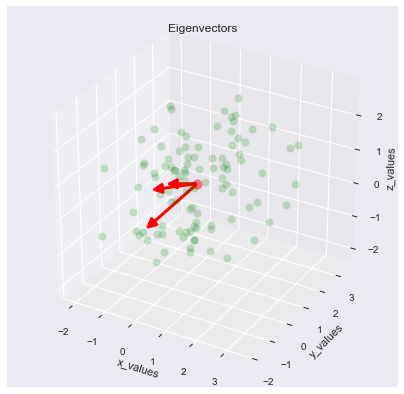

In [37]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [39]:
for ev in eig_vec_sc:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    # instead of 'assert' because of rounding errors

In [40]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

157.10156980625436
101.40907061352405
84.9498327784127


In [41]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.6680584  -0.66033187]
 [-0.39103915  0.70373825]
 [-0.6330769   0.2621341 ]]


In [45]:
transformed = matrix_w.T.dot(all_samples)
print(transformed.shape)

(2, 100)


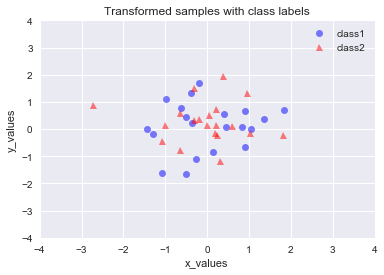

In [46]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()